In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

import os, random

%matplotlib inline

In [2]:
## Going back to the basics once again @ tf.guide 
## https://developers.google.com/machine-learning/guides/text-classification/step-1 

# Explore the data - IMDB
Movie reviews and labels for if positive or negative

In [3]:
def load_imdb_sentiment_analysis_dataset(data_path, seed=123):
    """Loads the IMDb movie reviews sentiment analysis dataset.

    # Arguments
        data_path: string, path to the data directory.
        seed: int, seed for randomizer.

    # Returns
        A tuple of training and validation data.
        Number of training samples: 25000
        Number of test samples: 25000
        Number of categories: 2 (0 - negative, 1 - positive)

    # References
        Mass et al., http://www.aclweb.org/anthology/P11-1015

        Download and uncompress archive from:
        http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
    """
    imdb_data_path = os.path.join(data_path, 'aclImdb')

    # Load the training data
    train_texts = []
    train_labels = []
    for category in ['pos', 'neg']:
        train_path = os.path.join(imdb_data_path, 'train', category)
        for fname in sorted(os.listdir(train_path)):
            if fname.endswith('.txt'):
                try:
                    with open(os.path.join(train_path, fname)) as f:
                        train_texts.append(f.read())
                    train_labels.append(0 if category == 'neg' else 1)
                except: 
                    pass

    # Load the validation data.
    test_texts = []
    test_labels = []
    for category in ['pos', 'neg']:
        test_path = os.path.join(imdb_data_path, 'test', category)
        for fname in sorted(os.listdir(test_path)):
            if fname.endswith('.txt'):
                try:
                    with open(os.path.join(test_path, fname)) as f:
                        test_texts.append(f.read())
                    test_labels.append(0 if category == 'neg' else 1)
                except: 
                    pass

    # Shuffle the training data and labels.
    random.seed(seed)
    random.shuffle(train_texts)
    random.seed(seed)
    random.shuffle(train_labels)

    return ((np.array(train_texts), np.array(train_labels)),
            (np.array(test_texts), np.array(test_labels)))
    

In [4]:
(train_x, train_y), (test_x, test_y) = load_imdb_sentiment_analysis_dataset( "D:\\zRepoz\\datasets\\aclImdb_v1")

In [5]:
print("Number of training observations: {}".format(len(train_x.shape) ) )
print("Number of testing observations: {}".format(len(test_x.shape) ) )

c = pd.Series(train_y).unique()
print("Number of unique labels/classes: Train = {} : {}".format(len(c), c) ) 
c = pd.Series(test_y).unique()
print("Number of unique labels/classes: Test = {} : {}".format(len(c), c) ) 

Number of training observations: 1
Number of testing observations: 1
Number of unique labels/classes: Train = 2 : [0 1]
Number of unique labels/classes: Test = 2 : [1 0]


In [6]:
# # Words and vocabulary - training Vs test 
# for db in [train_x, test_x]:
#     tokenz = nltk.word_tokenize( " ".join( db ) )
#     vocab = set([w.lower for w in tokenz])
#     print( "Number of words: {}, Vocab size: {}, Vocab-Word ratio: {}".format(
#         len(tokenz), len(vocab), len(vocab)/len(tokenz)
#     ))


 ----- train -----
Number of words: 7050404, Vocab size: 134732, Vocab-Word ratio: 0.019109826897862874
Most Common Words: 
 [('the', 288934), (',', 275552), ('.', 236955), ('and', 156071), ('a', 155931), ('of', 143500), ('to', 133293), ('is', 109024), ('/', 102033), ('>', 101972)]


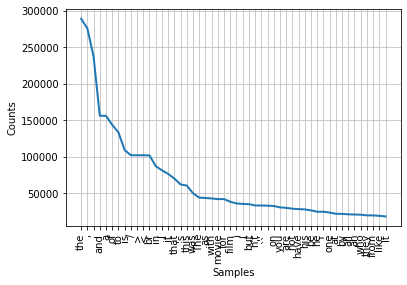


 ----- test -----
Number of words: 6894989, Vocab size: 132716, Vocab-Word ratio: 0.01924818154169644
Most Common Words: 
 [('the', 283618), (',', 267819), ('.', 231902), ('a', 152768), ('and', 152428), ('of', 141243), ('to', 130074), ('is', 105426), ('/', 100252), ('>', 100142)]


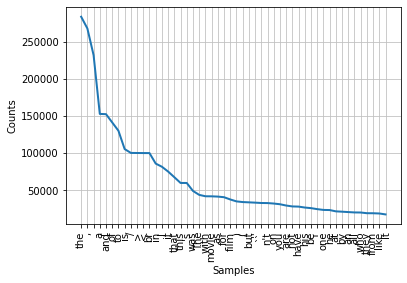

In [15]:
# using nltk @ train Vs test
for db, dbname in [ (train_x, "train"), (test_x, "test")]:
    print("\n ----- {} -----".format(dbname) )
    fd = nltk.FreqDist( nltk.word_tokenize(" ".join([ r for r in db]) )    )
    
#     tokenz = nltk.word_tokenize( db ) 
    vocab = set([w.lower for w in fd])
    
    print( "Number of words: {}, Vocab size: {}, Vocab-Word ratio: {}".format(
        fd.N(), len(vocab), len(vocab)/fd.N()
    ))
    
    print( "Most Common Words: \n", fd.most_common(10) ) 
    
    # plot top 50 words
    fd.plot(50)
    

In [17]:
# using nltk @ train entries

def word_stats( rec_txt ): 
    fd = nltk.FreqDist( nltk.word_tokenize( rec_txt ) )
    vocab = set([w.lower for w in fd])
    # word count, vocab count, vocab richness, n of most common word
    return ( fd.N(), len(vocab), len(vocab)/fd.N(), fd.freq( fd.max() )  )
            
    
stats_per_review = pd.Series(train_x).apply( word_stats)

print("Shapre of stats: {}".format( stats_per_review) )


Shapre of stats: 0        (71, 57, 0.8028169014084507, 0.04225352112676056)
1        (154, 100, 0.6493506493506493, 0.0454545454545...
2        (129, 89, 0.689922480620155, 0.05426356589147287)
3        (329, 150, 0.45592705167173253, 0.072948328267...
4        (398, 232, 0.5829145728643216, 0.0351758793969...
                               ...                        
24979    (222, 152, 0.6846846846846847, 0.0540540540540...
24980    (213, 136, 0.6384976525821596, 0.0281690140845...
24981    (372, 189, 0.5080645161290323, 0.0564516129032...
24982    (335, 189, 0.564179104477612, 0.04179104477611...
24983    (157, 104, 0.6624203821656051, 0.0382165605095...
Length: 24984, dtype: object


In [26]:
# summary stats per review 
mat = np.array(list(stats_per_review) )
df = pd.DataFrame( mat )
df.columns = [ 'n_words', 'n_vocab', 'lexical_diversity', 'n_most_common_1']
df.head(4)
print( "Summaries ")
df.describe()
    

Summaries 


,n_words,n_vocab,lexical_diversity,n_most_common_1
count,24984.000000,24984.000000,24984.000000,24984.000000
mean,282.198407,153.607949,0.598191,0.056772
std,210.334267,86.442229,0.094301,0.018129
min,11.000000,11.000000,0.040268,0.023256
25%,151.000000,97.000000,0.534247,0.046125
50%,210.000000,127.000000,0.597786,0.054106
75%,344.000000,187.000000,0.658333,0.064103
max,2818.000000,727.000000,1.000000,0.946309


In [ ]:
# 